## This notebook demonstrate Principal Component Analysis (PCA) and Clustering

In [184]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # for data visualization
%matplotlib inline
import seaborn as sns # for statistical data visualization
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import plotly.express as px

import warnings
warnings.filterwarnings('ignore') # for ignoring warnings

## PCA and Clustering 

Delta Airlines' website have data on all of their aircraft in a certain site section.  
We will investigate the different aircraft in Delta’s fleet. Which planes are similar? Which are dissimilar?  

In [185]:
# begin by loading inspecting the data
delta_data = pd.read_csv('delta.csv', index_col=0).reset_index()

In [186]:
delta_data.head()

,Aircraft,Seat Width (Club),Seat Pitch (Club),Seat (Club),Seat Width (First Class),Seat Pitch (First Class),Seats (First Class),Seat Width (Business),Seat Pitch (Business),Seats (Business),...,Video,Power,Satellite,Flat-bed,Sleeper,Club,First Class,Business,Eco Comfort,Economy
0,Airbus A319,0.0,0,0,21.0,36.0,12,0.0,0.0,0,...,0,0,0,0,0,0,1,0,1,1
1,Airbus A319 VIP,19.4,44,12,19.4,40.0,28,21.0,59.0,14,...,1,0,0,0,0,1,1,1,0,0
2,Airbus A320,0.0,0,0,21.0,36.0,12,0.0,0.0,0,...,0,0,0,0,0,0,1,0,1,1
3,Airbus A320 32-R,0.0,0,0,21.0,36.0,12,0.0,0.0,0,...,0,0,0,0,0,0,1,0,1,1
4,Airbus A330-200,0.0,0,0,0.0,0.0,0,21.0,60.0,32,...,1,1,0,1,0,0,0,1,1,1


### 1. Check correlation with visualization
Visualize pairwise correlation using scatterplot for columns ``'Accommodation', 'Cruising Speed (mph)', 'Range (miles)', 'Engines', 'Wingspan (ft)', 'Tail Height (ft)', 'Length (ft)'`` (i.e., columns 16-23 in ``delta_data``)

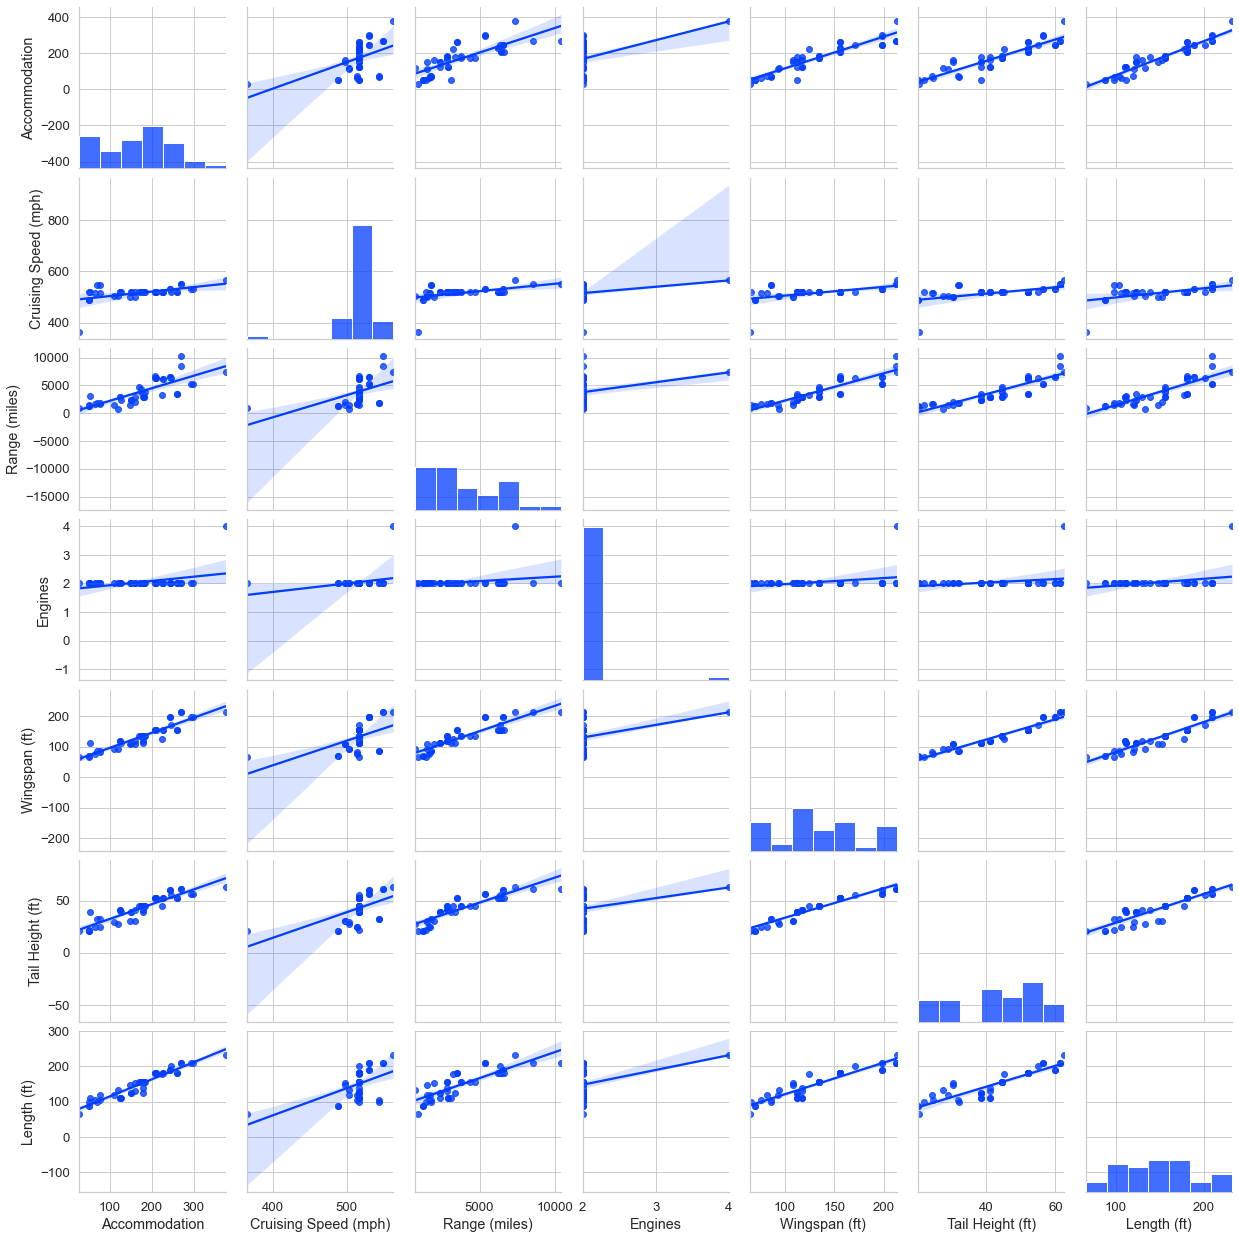

In [187]:
sns.pairplot(delta_data.iloc[:, 16:23], kind='reg') # reg could add a regression line

### 2. Prepare X
1. Identify all binary columns (i.e., a binary column is the column that only contains ``0`` and ``1`` as values)
2. Generate a dataframe ``X`` removing these binary columns and column ``Aircraft`` (since this is the ``y``)

In [188]:
# Identify all binary columns, then print out

bin_col = []
for col in delta_data.columns:
    if delta_data[col].nunique() == 2: # for a binary column, there're only 2 values
        if delta_data[col].unique().sum() == 1: # and the 2 values should be 0,1, so the sum should be 1
            bin_col.append(col)
bin_col

['Wifi',
 'Video',
 'Power',
 'Satellite',
 'Flat-bed',
 'Sleeper',
 'Club',
 'First Class',
 'Business',
 'Eco Comfort',
 'Economy']

In [189]:
# Generate a dataframe X removing these binary columns and column 'Aircraft'

bin_col.append('Aircraft')
X = delta_data.drop(bin_col, axis=1)
X

,Seat Width (Club),Seat Pitch (Club),Seat (Club),Seat Width (First Class),Seat Pitch (First Class),Seats (First Class),Seat Width (Business),Seat Pitch (Business),Seats (Business),Seat Width (Eco Comfort),...,Seat Width (Economy),Seat Pitch (Economy),Seats (Economy),Accommodation,Cruising Speed (mph),Range (miles),Engines,Wingspan (ft),Tail Height (ft),Length (ft)
0,0.0,0,0,21.0,36.0,12,0.0,0.00,0,17.20,...,17.20,30.5,96,126,517,2399,2,111.830,38.5830,111.000
1,19.4,44,12,19.4,40.0,28,21.0,59.00,14,0.00,...,0.00,0.0,0,54,517,3119,2,111.830,38.5830,111.000
2,0.0,0,0,21.0,36.0,12,0.0,0.00,0,17.20,...,17.20,31.5,120,150,517,2420,2,111.830,38.5830,123.250
3,0.0,0,0,21.0,36.0,12,0.0,0.00,0,17.20,...,17.20,31.5,120,150,517,2420,2,111.830,38.5830,123.250
4,0.0,0,0,0.0,0.0,0,21.0,60.00,32,18.00,...,18.00,30.5,181,243,531,6536,2,197.830,59.8300,188.670
5,0.0,0,0,0.0,0.0,0,21.0,80.00,34,18.00,...,18.00,30.5,168,243,531,6536,2,197.830,59.8300,188.670
6,0.0,0,0,0.0,0.0,0,21.0,80.00,34,18.00,...,18.00,30.5,227,293,531,5343,2,197.830,56.3300,208.830
7,0.0,0,0,0.0,0.0,0,20.0,60.00,34,18.00,...,18.00,30.5,232,298,531,5343,2,197.830,56.3300,208.830
8,0.0,0,0,19.6,37.0,12,0.0,0.00,0,18.10,...,18.10,31.0,83,110,504,1510,2,93.330,29.0830,120.000
9,0.0,0,0,21.0,37.0,12,0.0,0.00,0,17.20,...,17.20,30.5,94,124,517,2925,2,117.416,41.1670,110.330


### 3. Conducting PCA
1. Standardize X
2. Conduct PCA 
3. Calculate the amount of varialce each principal component explain, as well as the cumulative sum
4. Visualize the cumulative sum of explained variance and set the xticks as the number of components

In [190]:
# Standardize X
# use z-score (StandardScaler) for convenience for the covariance matrix

X_normalized = StandardScaler().fit_transform(X)

In [191]:
# Conduct PCA

pca = PCA().fit(X_normalized)

In [192]:
# Calculate the amount of variance each principal component explain, as well as the cumulative sum

# show the amount of varialce each principal component explain
exp_var = pca.explained_variance_
exp_var_ratio = pca.explained_variance_ratio_
print('The amount of varialce each principal component explain:\n', exp_var)
print('The amount of varialce each principal component explain (in ratio):\n', exp_var_ratio, '\n')

# cumulative sum of variance explained
exp_var_cumsum = np.cumsum(pca.explained_variance_)
exp_var_ratio_cumsum = np.cumsum(pca.explained_variance_ratio_)
print('cumulative sum:\n', exp_var_cumsum) # the ratio of eigen values
print('cumulative sum (in ratio):\n', exp_var_ratio_cumsum) # the ratio of eigen values

The amount of varialce each principal component explain:
 [1.04262264e+01 5.65201809e+00 3.63035319e+00 1.05519623e+00
 8.12428121e-01 4.15157149e-01 2.13261825e-01 9.77054626e-02
 7.40529724e-02 3.22929422e-02 2.72044078e-02 2.14204117e-02
 1.77567781e-02 1.44812044e-02 8.74796869e-03 6.12186053e-03
 3.78826530e-03 2.51788920e-03 6.60186091e-04 2.36556438e-04
 4.32651677e-33 1.51784380e-34]
The amount of varialce each principal component explain (in ratio):
 [4.63148487e-01 2.51071052e-01 1.61265689e-01 4.68733864e-02
 3.60892657e-02 1.84418981e-02 9.47340752e-03 4.34022199e-03
 3.28954319e-03 1.43450053e-03 1.20846026e-03 9.51526552e-04
 7.88782498e-04 6.43276642e-04 3.88597783e-04 2.71942151e-04
 1.68280380e-04 1.11848384e-04 2.93264482e-05 1.05081889e-05
 1.92190311e-34 6.74248797e-36] 

cumulative sum:
 [10.42622639 16.07824448 19.70859767 20.76379391 21.57622203 21.99137918
 22.204641   22.30234646 22.37639944 22.40869238 22.43589679 22.4573172
 22.47507398 22.48955518 22.4983031

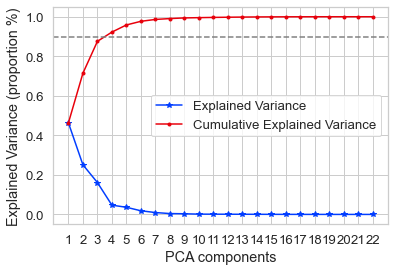

In [193]:
# Visualize the cumulative sum of explained variance and set the xticks as the number of components
# Here we haven't done the PCs selection, so I simply show all the PCs we got, which is 22 PCs

plt.plot(range(1, len(exp_var_ratio)+1), exp_var_ratio,'*-', label='Explained Variance')
plt.plot(range(1, len(exp_var_ratio)+1), exp_var_ratio_cumsum,'r.-', label='Cumulative Explained Variance')
plt.legend()
ax = plt.gca()
ax.set_xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22])
ax.set_xlabel('PCA components')
ax.set_ylabel('Explained Variance (proportion %)')

# which shows that the first two PCs accounts for more than 90% of the variance of the data.
plt.axhline(0.9, linestyle='--', color='grey')

### 4. Clustering

So, now that we’ve simplified the complex data set into a lower dimensional space we can visualize and
work with, we will use clustering to find patterns in the data, in our case, the aircraft which are most
similar? 

1. Pick the number of components which explain 90% (or a little greater) of the variation and represent the transformed data (projected onto the selected principal components) as ``components``
2. Using ``components`` as the input, run k-means for k from ``2`` to ``15`` (with ``random_state=1``), and visualize SSE by elbow curve  
3. Select the best k using elbow curve and run clustering with the selected k to get the cluster assignment
4. Visualize the cluster membership by scatter plots (for each pair of principle components as ``x`` and ``y`` axes)

In [194]:
# Pick the number of components which explain 90% (or a little greater) of the variation and 
# represent the transformed data (projected onto the selected principal components) as 'components'

pca_selected = PCA(n_components = 4) # from the plot above, I picked PC numbers = 4
components = pca_selected.fit_transform(X_normalized)

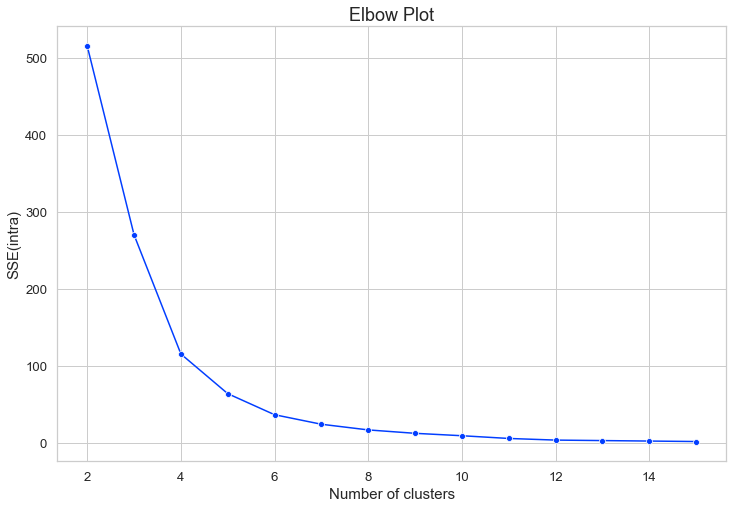

In [195]:
# Function for plotting elbow curve

def plot_elbow_curve(start, end, data):
    no_of_clusters = list(range(2, 16))
    cost_values = []

    for k in no_of_clusters:
        kp_model = KMeans(n_clusters=k,random_state=10)
        kp_model.fit_predict(components)
        cost_values.append(kp_model.inertia_)

    sns.set_theme(style="whitegrid", palette="bright", font_scale=1.2)
    plt.figure(figsize=(12, 8))
    ax = sns.lineplot(x=no_of_clusters, y=cost_values, marker="o", dashes=False)
    ax.set_title('Elbow Plot', fontsize=18)
    ax.set_xlabel('Number of clusters', fontsize=15)
    ax.set_ylabel('SSE(intra)', fontsize=15)
    plt.plot();

# Visualize elbow curve for k=2 to k=10
plot_elbow_curve(start=2, end=15, data = components)

In [196]:
# I picked number of clusters = 6 since too many cluster number migth be difficult to explain 
# clusters = 6 is able to reach SSE(intra) roughly be less than 50 and after that the slope is increasingly flattened

kp_model_6 = KMeans(n_clusters=6, random_state=10)
kp_model_6.fit_predict(components)

# print out the cluster assignment 
clusters = kp_model_6.labels_

In [197]:
# construct a dataframe components_df
components_df = pd.DataFrame(components, columns = ['PC1', 'PC2', 'PC3', 'PC4'])

# add cluster assignments to the dataframe
components_df['clusters'] = clusters
components_df

,PC1,PC2,PC3,PC4,clusters
0,-1.846524,-1.059108,-0.695352,-0.198667,0
1,-6.339099,13.985266,-3.515767,-0.189237,2
2,-1.534916,-1.160258,-0.795416,-0.032170,0
3,-1.534916,-1.160258,-0.795416,-0.032170,0
4,3.956221,0.863601,0.665803,-0.587795,1
5,4.128421,1.011687,0.755697,-0.723910,1
6,4.502245,0.884321,0.533421,-0.294821,1
7,4.374003,0.733624,0.432121,-0.172060,1
8,-2.429000,-1.351514,-0.284228,-0.257871,0
9,-1.712051,-1.014837,-0.757266,-0.237264,0


<AxesSubplot:xlabel='PC3', ylabel='PC4'>

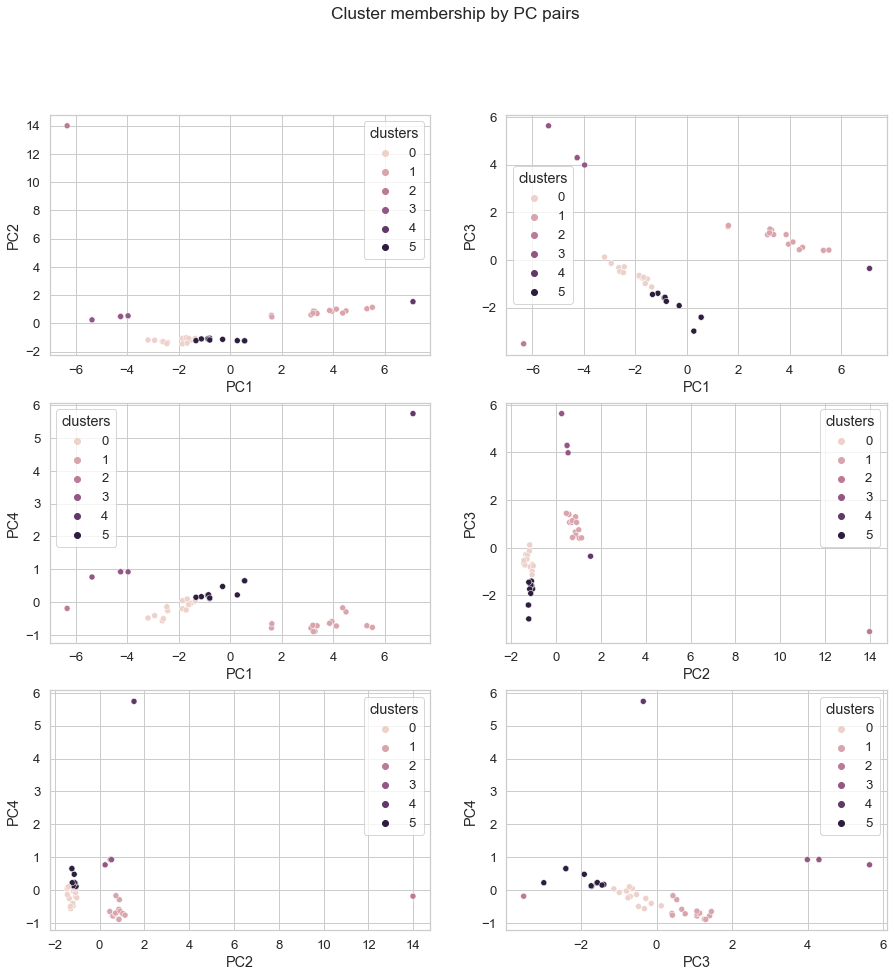

In [198]:
# Visualize the cluster membership by scatter plots (for each pair of principle components as x and y axes)

import seaborn as sns

fig, axes = plt.subplots(3, 2, figsize=(15, 15), sharey=False)
fig.suptitle('Cluster membership by PC pairs')

sns.scatterplot(ax=axes[0, 0], x = components_df.PC1, y = components_df.PC2, hue = components_df.clusters)
sns.scatterplot(ax=axes[0, 1], x = components_df.PC1, y = components_df.PC3, hue = components_df.clusters)
sns.scatterplot(ax=axes[1, 0], x = components_df.PC1, y = components_df.PC4, hue = components_df.clusters)
sns.scatterplot(ax=axes[1, 1], x = components_df.PC2, y = components_df.PC3, hue = components_df.clusters)
sns.scatterplot(ax=axes[2, 0], x = components_df.PC2, y = components_df.PC4, hue = components_df.clusters)
sns.scatterplot(ax=axes[2, 1], x = components_df.PC3, y = components_df.PC4, hue = components_df.clusters)